In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email-dataset/emails.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/spam-email-dataset/emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df['spam'].unique()

array([1, 0])

In [7]:
df['text'][45], df['spam'][45]

('Subject: 1000 full color brochures 335  the tsa design products & ideas expo show is just around the corner and if you are going to be an exhibitor you will need something to hand out to your prospective customers . wiley printing wants to help you do that by offering great prices on quality print collateral . here are a few examples :  1 , 000 business cards for $ 55 - full color , uv coated with 14 pt . paper stock  1 , 000 postcards for $ 150 - full color , uv coated with 14 pt . paper stock  1 , 000 brochures for $ 335 - full color , two sided 100 # gloss text  if you are interested in any of these offers or if you are looking for something a little different please contact us through one of the methods below .  wiley print  4650 cole ave # 105  dallas , tx 75205  214 . 443 . 0908 phone  214 . 443 . 0308 fax  info @ wileyprint . com  note : this is the first and last time wiley print will ever send you an email . however , if you would like to opt out please reply to this email w

In [8]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

In [9]:
preprocess_text(df['text'][45])

'subject full color brochures tsa design products ideas expo show around corner going exhibitor need something hand prospective customers wiley printing wants help offering great prices quality print collateral examples business cards full color uv coated pt paper stock postcards full color uv coated pt paper stock brochures full color two sided gloss text interested offers looking something little different please contact us one methods wiley print cole ave dallas tx phone fax info wileyprint com note first last time wiley print ever send email however would like opt please reply email remove subject line'

In [10]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [11]:
for i in range(3):
    print("Original: ",df['text'][i])
    print("Preprocessed: ", df['preprocessed_text'][i])

Original:  Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability 

In [13]:
X = df['preprocessed_text']
y = df['spam']

In [14]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), svm.SVC(kernel='linear', C=0.001))
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=0.001, kernel='linear'))])

In [15]:
# Make prediction on Training dataset
train_preds = model.predict(X_train)

In [16]:
# Make prediction on Testing dataset
test_preds = model.predict(X_test)

### Performance evaluation on training data set

In [17]:
confusion_matrix(train_preds, y_train)

array([[3504,    5],
       [   0, 1073]])

In [18]:
# Classification report
print(classification_report(train_preds, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3509
           1       1.00      1.00      1.00      1073

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



### Performance evaluation on testing dataset

In [20]:
confusion_matrix(test_preds, y_test)

array([[848,  69],
       [  8, 221]])

In [19]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       917
           1       0.76      0.97      0.85       229

    accuracy                           0.93      1146
   macro avg       0.88      0.94      0.90      1146
weighted avg       0.94      0.93      0.94      1146



# Some statistical Analysis

### Top words contributing to identify wheather the email is spam or not

In [30]:
# Get the feature names from the CountVectorizer
feature_names = model.named_steps['countvectorizer'].get_feature_names_out()

# Get the log probabilities from the trained Support vector classification model
log_probabilities = model.named_steps['svc'].coef_

print(feature_names.shape, log_probabilities.shape)

(30326,) (1, 30326)


In [48]:
log_prob_arr= log_probabilities.toarray()

In [50]:
log_prob_arr[0].shape

(30326,)

In [51]:
# Create a dataframe with feature_names and log probabilities
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'LogProbability_spam': log_prob_arr[0]})

feature_importance_df

,Feature,LogProbability_spam
0,aa,-0.000259
1,aaa,-0.000407
2,aadedeji,0.000000
3,aagrawal,0.000000
4,aal,0.000000
...,...,...
30321,zygoma,0.000834
30322,zymg,0.000307
30323,zzn,0.000000
30324,zzncacst,-0.000042


In [55]:
# Top words contributing to identify mail spam or not
spam_contribute = feature_importance_df.sort_values(by='LogProbability_spam', ascending=False).head(10)

# Top words contributng to identify mail is non spam
non_spam_contribute = feature_importance_df.sort_values(by='LogProbability_spam', ascending=True).head(10)

print("words contribute to identify the mail is spam or not")
print(spam_contribute)

print("words do not contribute to identify the mail is spam or not")
print(non_spam_contribute)

words contribute to identify the mail is spam or not
            Feature  LogProbability_spam
18569           oem             0.052063
29973            ya             0.040191
24968      software             0.038672
22447       removed             0.036643
11269        graand             0.036396
4666          click             0.035757
15973  mainoemstore             0.034706
23663          save             0.029763
22622   requisition             0.029578
28702        viagra             0.027544
words do not contribute to identify the mail is spam or not
               Feature  LogProbability_spam
26859           thanks            -0.022958
28774            vince            -0.018604
5375   congratulations            -0.015609
28423         vacation            -0.012159
23879             sddp            -0.011924
26856            thank            -0.011810
8422             elena            -0.011412
1832              attl            -0.010974
25663          stinson            -0.010

### Misclassifies samples

In [59]:
# Adding predictions to the test
test_set_with_predictions = X_test.to_frame().assign(Predicted=test_preds, Actual=y_test)
test_set_with_predictions

,preprocessed_text,Predicted,Actual
4445,subject energy derivatives conference may toro...,0,0
4118,subject financial maths course part vince case...,0,0
3893,subject bullet points please respond hi vince ...,0,0
4210,subject enron default swaps darrell sending te...,0,0
5603,subject power question steve elena chilkina gi...,0,0
...,...,...,...
3651,subject transportion model worked great hear r...,0,0
1760,subject new business h lyette working systemat...,0,0
733,subject know get search engine results submitt...,1,1
4698,subject consulting arrangement thanks vince te...,0,0


In [60]:
# Display miclassifies samples
misclassified_samples = test_set_with_predictions[test_set_with_predictions['Predicted'] != test_set_with_predictions['Actual']]
misclassified_samples

,preprocessed_text,Predicted,Actual
401,subject nymex invitation learn power trading p...,0,1
80,subject update account information dear client...,0,1
333,subject benachrichtung zum fehlgeschlagen dies...,0,1
1411,subject investment may concern keep receiving ...,1,0
712,subject wm subject dear guests explore turkey ...,0,1
...,...,...,...
693,subject neugierig content type text plain cont...,0,1
210,subject software easy use fully functional unr...,0,1
339,subject save money getting oem software need s...,0,1
2842,subject basic idea price offer matching clause...,1,0


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [65]:
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
accuracy = accuracy_score(y_test, test_preds)

print(f"Accuracy: {accuracy: .2f}")
print(f"Precision: {precision: .2f}")
print(f"Recall: {recall: .2f}")
print(f"f1: {f1: .2f}")

Accuracy:  0.93
Precision:  0.97
Recall:  0.76
f1:  0.85


### Data Visualization

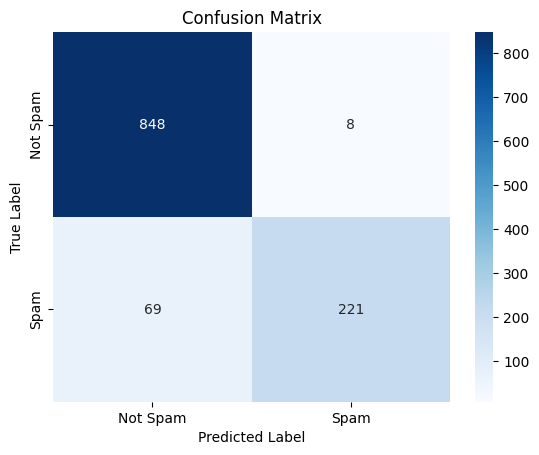

In [70]:
import seaborn as sns
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'], fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()